## Part 1 - Getting Started [1 mark]

In Parts 1- 6 of this project, we are designing a controller to manage the ailerons of an F16 Aircraft! 

![Ailerons](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/airplane.gif) [Ref](https://www.grc.nasa.gov/www/k-12/BGA/Mike/airplane_parts_act.htm) 


The features describe the airplane's status, and our goal is to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression without regularization.

In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

1. Print the dataframe.
2. Prepare your dataset as follows: **[1]**
*   Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set `random_state=1`.
*   Standardize the data using StandardScaler from sklearn.
*   Insert a first column of 1s in both the training and validation data sets.


In [ ]:
### YOUR CODE HERE ###
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.019,0.019,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021,0.021,0.021,0.021,0.021,0.000,0.0,-0.002,0.0,0.0,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,0.018,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,-0.002,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.018,0.018,0.017,-0.001,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.034,0.034,0.032,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler=StandardScaler()
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=1)
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)
X_train=np.hstack((np.ones(np.shape(X_train)[0]).reshape(-1,1),X_train))
X_val=np.hstack((np.ones(np.shape(X_val)[0]).reshape(-1,1),X_val))

## Part 2 - Linear Regression - Direct Solution [2 marks]

Implement the direct solution to linear regression on the training set. **[1]**

Report the root-mean-square error (RMSE) for both the training and validation sets.**[1]**
**The RMSE for training set is 0.000176 and the RMSE for validation set is 0.000173.**

In [ ]:
### YOUR CODE HERE ###
from sklearn.metrics import mean_squared_error
from scipy.linalg import inv
W = inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
y_train_pred=np.dot(X_train,W)
y_val_pred=np.dot(X_val,W)
y_train_RMSE=np.sqrt(mean_squared_error(y_train,y_train_pred))
y_val_RMSE=np.sqrt(mean_squared_error(y_val,y_val_pred))
print('RMSE for training set: {}'.format(y_train_RMSE))
print('RMSE for validation set: {}'.format(y_val_RMSE))

RMSE for training set: 0.0001756213073489088
RMSE for validation set: 0.00017255403711398355


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a full batch gradient descent algorithm and record the training time for our model.

1. Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 1e-2$, and by iterating until your model's validation RMSE converges. Here we will consider it converged once validation RMSE is within 0.1% of the Direct Solution RMSE (i.e., $RMSE_{GD} <= RMSE_{Direct Solution}*1.001$). We call this value **Convergence threshold ($CT = RMSE_{Direct Solution}*1.001$)** and will use this value in the next parts too.

  *  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial.**[0.5]**

  * Plot the Training RMSE and the Validation RMSE vs epoch on the same figure. Epoch is the number of passes on the full training set - for full batch gradient descent, it's the same as the # of gradient updates (iterations). **[0.5]**

2. Comment on overfitting/underfitting - is running the algorithm too long a concern here? **[1]** **This model has no underfitting/overfitting issue since the RMSE from training set and validation set are very close, and if I didn't divide the initial weights by a large number, it will take a very long time to converge.**

In [ ]:
import time
start_time = time.time() ## Records current time

## GD Script -- Sample code in tutorial! ##
lr=1E-2
ct=y_val_RMSE*1.001
train_RMSE=[]
validation_RMSE=[]
w = (np.random.random(41)/1E4).reshape(-1,1)
y_train_pred=np.dot(X_train,w)
y_val_pred=np.dot(X_val,w)
t_RMSE=np.sqrt(mean_squared_error(y_train,y_train_pred))
v_RMSE=np.sqrt(mean_squared_error(y_val,y_val_pred))
train_RMSE.append(t_RMSE)
validation_RMSE.append(v_RMSE)
y_train=y_train.reshape(-1,1)
y_val=y_val.reshape(-1,1)
while v_RMSE > ct:
    gradient = (1/len(y_train) * np.dot(X_train.T, y_train_pred-y_train)).reshape(-1,1)
    w = w - lr * gradient
    y_train_pred=np.dot(X_train,w)
    y_val_pred=np.dot(X_val,w)
    t_RMSE=np.sqrt(mean_squared_error(y_train,y_train_pred))
    v_RMSE=np.sqrt(mean_squared_error(y_val,y_val_pred))
    train_RMSE.append(t_RMSE)
    validation_RMSE.append(v_RMSE)

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

--- Total Training Time: 0.6816654205322266 (s) ---


Text(0.5, 1.0, 'RMSE vs epoch')

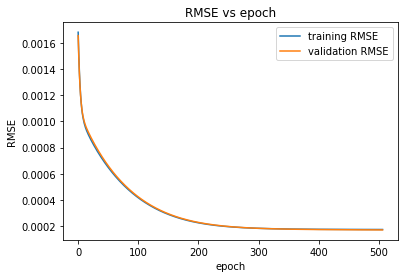

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_RMSE,label='training RMSE')
plt.plot(validation_RMSE,label='validation RMSE')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.title('RMSE vs epoch')

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached.**[1]** The inputs of that function are 
  * Training Data
  * Validation Data
  * Batch size
  * Learning Rate
  * Convergence Threshold (CT)
  * Maximum Iterations = 20000

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch (the number of epochs is the number of passes on the full data set).
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds the array would look like: [2 4 6 8 ...]).
 * For certain batchsizes GD might not converge to a solution. For that reason we have a parameter "Maximum iterations" where we limit the total number of iterations that this function can perform. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (ie all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 10 values, including 1 -- Stochastic GD), each time using a learning rate of $\alpha= 1e-2$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,...).** These batchsizes fit better on the hardware and may achieve higher performance.  **[0.5]**
  * Plot training and validation RMSE vs. **epoch** for all the batchsizes in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  * Plot training and validation RMSE vs. **time** for all the batchsizes in a figure. The X-axis is Time and the Y-axis is RMSE. **[0.5]**
  * Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**
  * Describe your findings, including the main takeawyas from each of your plots. **[1]**  

*   **For stochastic gradient descent (batch size = 1), the given learning rate cannot converge and will bring an overflow problem and throw an error since the error goes to infinite (NaN), so there is no way to plot the curve for stochastic gradient descent. I think for mini-batch gradient descent with a small batch size, the learning rate needs to be smaller than full-batch gradient descent since when we are calcualting the gradient, we use 1/N where N is the batch size, if N is small then 1/N will be large comparing to the situation when N is large, and that's the reason why a smaller learning rate is needed.**
*   **The plots of RMSE vs. epoch and RMSE vs. training time show the same trend, with smaller batch size, the required epoch and training time are shorter in general. The total training time for smallest batch size (200) is much shorter than the training time for full batch gradient descent. From the plot of total training time vs. batch size, the relation between total trianing time and batch size is not perfectly linear and it fluctuates, and I think the reason might be the stochastic nature of my mini-batch gradient descent algorithm(I shuffle the dataset after each epoch).**


In [ ]:
### YOUR CODE HERE ###
def mini_batch_GD(training_data,validation_data,batch_size,learning_rate,convergence_threshold,maximum_iteration=20000):
    w = (np.random.random(41)/1E4).reshape(-1,1)
    train_RMSE=[]
    validation_RMSE=[]
    time_array=[]
    n_batch=training_data.shape[0]//batch_size
    start_time=time.time()
    for i in range(maximum_iteration):
        mini_batches=[]
        np.random.shuffle(training_data)
        for j in range(n_batch+1):
            mini_batch=training_data[j*batch_size:(j+1)*batch_size,:]
            X_batch=mini_batch[:,:-1]
            y_batch=mini_batch[:,-1]
            mini_batches.append((X_batch,y_batch))
        for k in range(n_batch+1):
            X_batch,y_batch=mini_batches[k]
            y_batch=y_batch.reshape(-1,1)
            y_batch_pred=np.dot(X_batch,w)
            gradient = ((1/batch_size) * np.dot(X_batch.T, y_batch_pred-y_batch)).reshape(-1,1)
            w = w - learning_rate * gradient
        end_time=time.time()
        time_array.append(end_time-start_time)
        y_train_pred=np.dot(training_data[:,:-1],w)
        y_val_pred=np.dot(validation_data[:,:-1],w)
        t_RMSE=np.sqrt(mean_squared_error(training_data[:,-1].reshape(-1,1),y_train_pred))
        v_RMSE=np.sqrt(mean_squared_error(validation_data[:,-1].reshape(-1,1),y_val_pred))
        train_RMSE.append(t_RMSE)
        validation_RMSE.append(v_RMSE)
        if v_RMSE <= convergence_threshold:
            break
    return w,train_RMSE,validation_RMSE,time_array
    




In [ ]:
training_data=np.hstack((X_train,y_train))
validation_data=np.hstack((X_val,y_val))

In [ ]:
batch_sizes=[200+200*x for x in range(10)]
learning_rate=1E-2
w_dict={}
train_RMSE_dict={}
validation_RMSE_dict={}
time_array_dict={}

In [ ]:
for batch_size in batch_sizes:
    w,train_RMSE,validation_RMSE,time_array=mini_batch_GD(training_data,validation_data,batch_size,learning_rate,convergence_threshold=ct,maximum_iteration=20000)
    w_dict[batch_size]=w
    train_RMSE_dict[batch_size]=train_RMSE
    validation_RMSE_dict[batch_size]=validation_RMSE
    time_array_dict[batch_size]=time_array


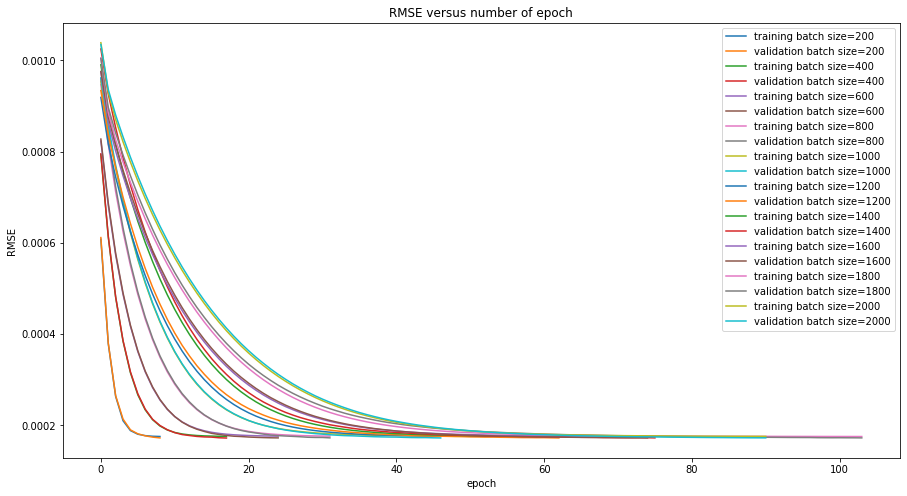

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlabel('epoch')
ax.set_ylabel('RMSE')
ax.set_title('RMSE versus number of epoch')
for batch_size in batch_sizes:
    ax.plot(train_RMSE_dict[batch_size],label='training batch size={}'.format(batch_size))
    ax.plot(validation_RMSE_dict[batch_size],label='validation batch size={}'.format(batch_size))
    ax.legend()

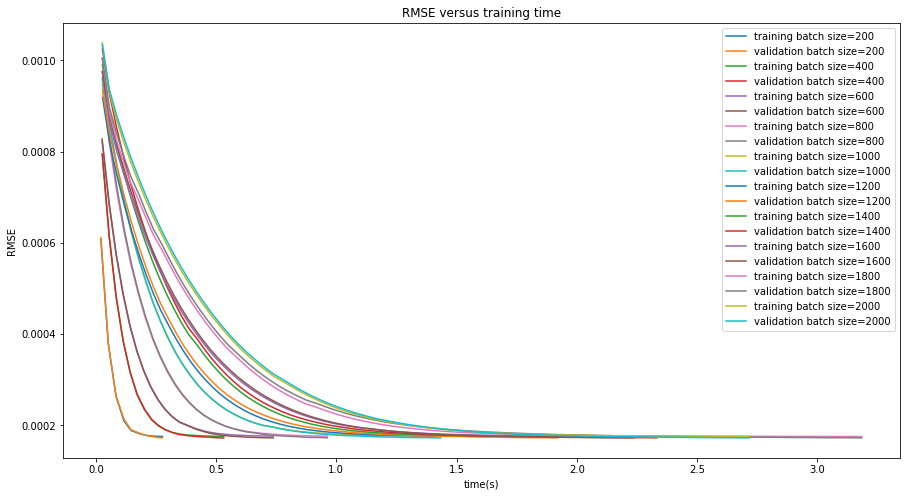

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlabel('time(s)')
ax.set_ylabel('RMSE')
ax.set_title('RMSE versus training time')
for batch_size in batch_sizes:
    ax.plot(time_array_dict[batch_size],train_RMSE_dict[batch_size],label='training batch size={}'.format(batch_size))
    ax.plot(time_array_dict[batch_size],validation_RMSE_dict[batch_size],label='validation batch size={}'.format(batch_size))
    ax.legend()

In [ ]:
total_training_time=[]
for batch_size in batch_sizes:
    total_training_time.append(time_array_dict[batch_size][-1])

Text(0.5, 1.0, 'Total training time versus batch size')

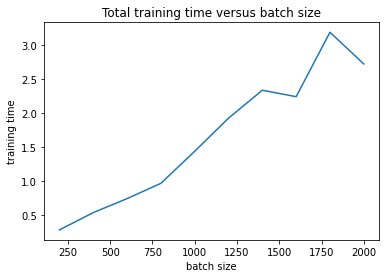

In [ ]:
plt.plot(batch_sizes,total_training_time)
plt.xlabel('batch size')
plt.ylabel('training time')
plt.title('Total training time versus batch size')

## Part 5 - Gradient Descent Learning Rate [2 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

Select the best batch size based on the fastest convergence time and sweep the learning rate (at least 10 values) while applying Mini-batch GD. 
  1. Plot the training and validation RMSE vs **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  2. Plot the training and validation RMSE vs **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  3. Describe your findings, including the main takeawyas from each of your plots. **[1]**


*   **From the first plot, it is clear that with lower learning rate, the model needs more epochs to converge, and the decrease in learning rate is not proportional to the increase in number of epochs. Initially the decrease of learning rate will not affect the number of epochs too much but when the learning rate decreased to 1/10 of original learning rate, it requires about 10x original number of epochs to converge.**
*   **From the second plot, it shows that with lower learning rate, the model needs more time to converge, and the curves also show similar behavior as above.**





In [ ]:
### YOUR CODE HERE ###
batch_size=200
learning_rates=[round(1E-2*0.1*x,3) for x in range(1,11) ]
w_dict={}
train_RMSE_dict={}
validation_RMSE_dict={}
time_array_dict={}

In [ ]:
for learning_rate in learning_rates:
    w,train_RMSE,validation_RMSE,time_array=mini_batch_GD(training_data,validation_data,batch_size,learning_rate,convergence_threshold=ct,maximum_iteration=20000)
    w_dict[learning_rate]=w
    train_RMSE_dict[learning_rate]=train_RMSE
    validation_RMSE_dict[learning_rate]=validation_RMSE
    time_array_dict[learning_rate]=time_array


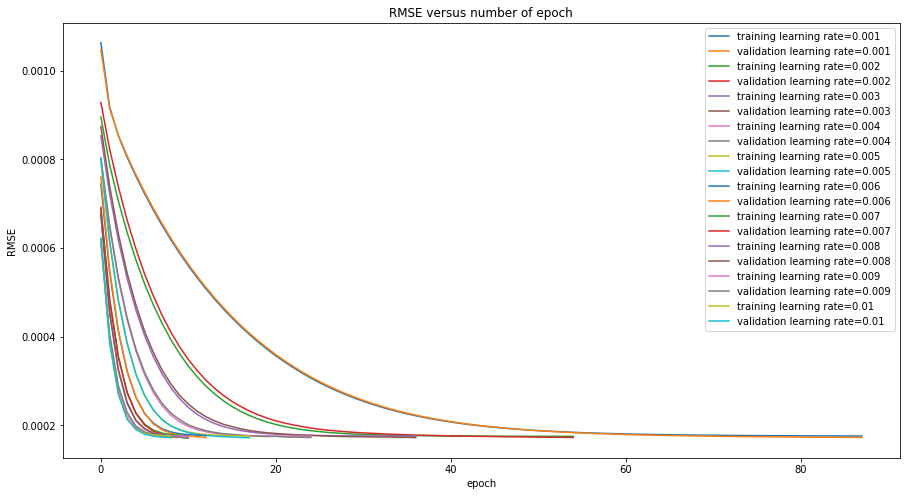

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlabel('epoch')
ax.set_ylabel('RMSE')
ax.set_title('RMSE versus number of epoch')
for learning_rate in learning_rates:
    ax.plot(train_RMSE_dict[learning_rate],label='training learning rate={}'.format(learning_rate))
    ax.plot(validation_RMSE_dict[learning_rate],label='validation learning rate={}'.format(learning_rate))
    ax.legend()

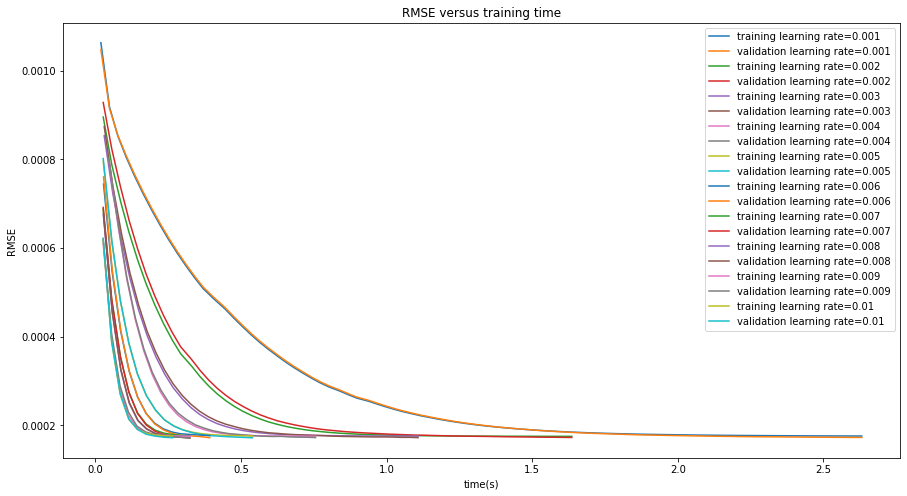

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlabel('time(s)')
ax.set_ylabel('RMSE')
ax.set_title('RMSE versus training time')
for learning_rate in learning_rates:
    ax.plot(time_array_dict[learning_rate],train_RMSE_dict[learning_rate],label='training learning rate={}'.format(learning_rate))
    ax.plot(time_array_dict[learning_rate],validation_RMSE_dict[learning_rate],label='validation learning rate={}'.format(learning_rate))
    ax.legend()

## Part 6 - Gradient Descent with Adaptive Learning Rate [4 marks]
Implement an adaptive learning rate scheme where you start a mini-batch gradient descent with a large learning rate and decrease the learning rate while you are getting closer to the local minima. It's up to you to come up with a way to set **when** and **how much** do you want to change the learning rate. 
Our goal is to find a method for faster convergence. 
  1. Describe **[1]** and implement **[1]** your method.**My criteria is when the absolute error between validation RMSE and convergence threshold is below 70% of convergence threshold, the learning rate will change to 50% of original learning rate and the initial learning rate I chose is 3E-2 which cannot converge if using static learning rate. The idea is to use the initial learning rate to rapidly reduce the RMSE then use a smaller learning rate to converge.**
  2. Plot the training and validation RMSE vs **epoch** for your method (adaptive learning rate), alongside your best training run from Part 5 (static learning rate). **[1]**
  3. Plot the training and validation RMSE vs **time** for your method (adaptive learning rate), alongside your best training run from Part 5 (static learning rate). **[1]**
  **From the plots, it is clear that with adaptive learning rate, the gradient descent process converges faster than with static learning rate.**

In [ ]:
### YOUR CODE HERE ###
def mini_batch_GD_ada_lr(training_data,validation_data,batch_size,learning_rate,convergence_threshold,maximum_iteration=20000):
    w = (np.random.random(41)/1E4).reshape(-1,1)
    train_RMSE=[]
    validation_RMSE=[]
    time_array=[]
    n_batch=training_data.shape[0]//batch_size
    start_time=time.time()
    flag=1
    for i in range(maximum_iteration):
        mini_batches=[]
        np.random.shuffle(training_data)
        for j in range(n_batch+1):
            mini_batch=training_data[j*batch_size:(j+1)*batch_size,:]
            X_batch=mini_batch[:,:-1]
            y_batch=mini_batch[:,-1]
            mini_batches.append((X_batch,y_batch))
        for k in range(n_batch+1):
            X_batch,y_batch=mini_batches[k]
            y_batch=y_batch.reshape(-1,1)
            y_batch_pred=np.dot(X_batch,w)
            gradient = ((1/batch_size) * np.dot(X_batch.T, y_batch_pred-y_batch)).reshape(-1,1)
            w = w - learning_rate * gradient
        end_time=time.time()
        time_array.append(end_time-start_time)
        y_train_pred=np.dot(training_data[:,:-1],w)
        y_val_pred=np.dot(validation_data[:,:-1],w)
        t_RMSE=np.sqrt(mean_squared_error(training_data[:,-1].reshape(-1,1),y_train_pred))
        v_RMSE=np.sqrt(mean_squared_error(validation_data[:,-1].reshape(-1,1),y_val_pred))
        train_RMSE.append(t_RMSE)
        validation_RMSE.append(v_RMSE)
        #Adapitive learning rate
        if flag:
            if np.abs(convergence_threshold-v_RMSE) < 0.7*convergence_threshold:
                learning_rate=0.5*learning_rate
                flag=0
        if v_RMSE <= convergence_threshold:
            break
    return w,train_RMSE,validation_RMSE,time_array

In [ ]:
batch_size=200
learning_rate=3E-2
w,train_RMSE,validation_RMSE,time_array=mini_batch_GD_ada_lr(training_data,validation_data,batch_size,learning_rate,convergence_threshold=ct,maximum_iteration=20000)

In [ ]:
prev_train_RMSE=train_RMSE_dict[0.01]
prev_validation_RMSE=validation_RMSE_dict[0.01]
prev_time_array=time_array_dict[0.01]

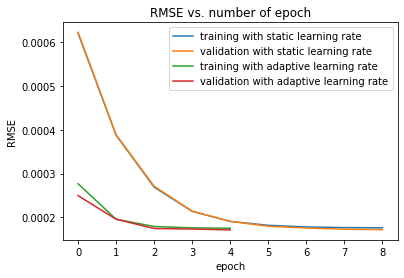

In [ ]:
plt.plot(prev_train_RMSE,label='training with static learning rate')
plt.plot(prev_validation_RMSE,label='validation with static learning rate')
plt.plot(train_RMSE,label='training with adaptive learning rate')
plt.plot(validation_RMSE,label='validation with adaptive learning rate')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.title('RMSE vs. number of epoch')
plt.legend()

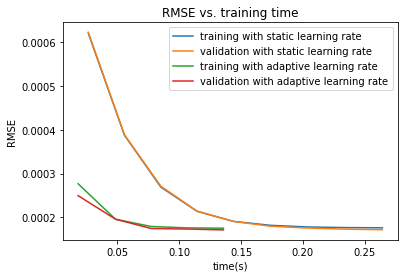

In [ ]:
plt.plot(prev_time_array,prev_train_RMSE,label='training with static learning rate')
plt.plot(prev_time_array,prev_validation_RMSE,label='validation with static learning rate')
plt.plot(time_array,train_RMSE,label='training with adaptive learning rate')
plt.plot(time_array,validation_RMSE,label='validation with adaptive learning rate')
plt.xlabel('time(s)')
plt.ylabel('RMSE')
plt.title('RMSE vs. training time')
plt.legend()

## Part 7 - Gradient Descent with Additional Features and Regularization [3 marks]

Now, we'll apply linear regresssion to a toy dataset (`LR_data.csv`), with 10 features `x1`-`x10` and a "measurement" `y`. We'll take a few shortcuts by using built-in sklearn functions.

1. Data Preparation **[0.5]**
  * Print the dataset, and create Numpy arrays with inputs (X) and outputs (y). 
  * Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set `random_state=1`.

2. Linear Regression **[0.5]**
  * Standardize the data using StandardScaler from sklearn.
  * Use the `sklearn.linear_model.LinearRegression` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to perform linear regression.
  * Print the RMSE for training and validation data.

3. Linear Regression with Additional Features **[0.5]**
  * Let's add more features to our dataset (up to degree 8) using `sklearn.preprocessing.PolynomialFeatures` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). You'll want to create the additional features first, then perform standardization (start from non-standardized data).
  * Again, use `sklearn.linear_model.LinearRegression` to perform linear regression.
  * Print the RMSE for training and validation data.

4. Linear Regression with Additional Features and Regularization **[0.5]**
  * Let's switch models, and instead use the `sklearn.linear_model.Ridge` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) to perform linear regression with regularization. Apply the model to the processed data (additional, standardized) you used in 3 above. Use a `FOR` loop to run `sklearn.linear_model.Ridge` with different `alpha` values. Specifically, sweep `alpha` from 1E-2 to 1E10 (each step is an order of magnitude jump).

5. Discuss your results. What do you conclude? **[1]**
**With the original features, the RMSE of training set and validation set are both very high and it is a clear sign of underfitting. With additional feature, the RMSE of training set becomes very small but the RMSE of validation set is still very large and it is a clear sign of overfitting. With regularization, the RMSE of validation set starts to decrease a little but the RMSE of training set becomes larger at the same time, the hyperparameter alpha relates to regularization strength. Theoretically, with proper alpha value, the regularization term can prevent overfitting, but this method does not work very well in this case.**

In [ ]:
import pandas as pd
df=pd.read_csv("https://www.eecg.utoronto.ca/~hadizade/APS1070/LR_data.csv" , skipinitialspace=True)

In [ ]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.454481,4.940543,7.116015,3.805131,4.105432,1.832290,5.211909,5.088293,3.841250,6.121133,6.575066e+06
1,4.907182,1.653654,7.339445,9.065282,7.169233,2.354136,2.893005,8.720131,8.646473,3.806860,8.419881e+06
2,1.842804,1.183878,4.203206,6.815847,6.655899,8.295816,3.556779,5.794679,3.260723,5.463808,9.745537e+04
3,2.393457,0.094127,3.208929,0.497443,4.318127,4.999247,9.470238,3.061990,7.312995,5.475240,1.129200e+04
4,5.093724,3.905293,4.858562,4.465484,0.947091,9.410307,8.137329,9.043838,9.128607,0.790795,3.105448e+05
...,...,...,...,...,...,...,...,...,...,...,...
195,2.936450,2.094812,9.493814,3.411240,4.350940,0.386062,1.303290,2.699563,7.622569,3.037162,6.599726e+07
196,4.915597,1.953974,7.312552,9.331203,1.329366,8.286760,5.233018,7.476923,7.043560,5.745565,8.176250e+06
197,6.772096,6.406489,4.638352,7.042340,0.912338,7.568296,1.194928,2.592840,9.386478,4.147710,2.144147e+05
198,3.940339,4.330498,6.693371,9.169265,0.858846,0.601942,2.635455,2.037859,7.883720,8.525164,4.028735e+06


In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X_train,y_train)
train_pred=reg.predict(X_train)
validation_pred=reg.predict(X_val)

In [ ]:
print('RMSE of training set: {}'.format(np.sqrt(mean_squared_error(y_train,train_pred))))
print('RMSE of validation set: {}'.format(np.sqrt(mean_squared_error(y_val,validation_pred))))

RMSE of training set: 16296980.655667372
RMSE of validation set: 14061578.864980105


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(8)
X=poly.fit_transform(X)
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=1)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)
reg=LinearRegression().fit(X_train,y_train)
train_pred=reg.predict(X_train)
validation_pred=reg.predict(X_val)
print('RMSE of training set: {}'.format(np.sqrt(mean_squared_error(y_train,train_pred))))
print('RMSE of validation set: {}'.format(np.sqrt(mean_squared_error(y_val,validation_pred))))



RMSE of training set: 1.1154878119198678e-07
RMSE of validation set: 10920908.905406754


In [ ]:
from sklearn.linear_model import Ridge
powers=[x for x in range(-2,11)]
for power in powers:
    alpha=10**power
    clf=Ridge(alpha=alpha)
    clf.fit(X_train,y_train)
    train_pred=clf.predict(X_train)
    validation_pred=clf.predict(X_val)
    print('RMSE of training set with alpha=1E{}: {}'.format(power,np.sqrt(mean_squared_error(y_train,train_pred))))
    print('RMSE of validation set with alpha=1E{}: {}'.format(power,np.sqrt(mean_squared_error(y_val,validation_pred))))



RMSE of training set with alpha=1E-2: 321.01240916309644
RMSE of validation set with alpha=1E-2: 10919504.125893764
RMSE of training set with alpha=1E-1: 3199.3496468416506
RMSE of validation set with alpha=1E-1: 10916171.329033064
RMSE of training set with alpha=1E0: 30988.518341657847
RMSE of validation set with alpha=1E0: 10884651.018827904
RMSE of training set with alpha=1E1: 248080.3696494477
RMSE of validation set with alpha=1E1: 10659707.103878867
RMSE of training set with alpha=1E2: 1196923.6228686073
RMSE of validation set with alpha=1E2: 9484394.22011948
RMSE of training set with alpha=1E3: 3609078.2596920887
RMSE of validation set with alpha=1E3: 5633182.875138311
RMSE of training set with alpha=1E4: 7712389.432217537
RMSE of validation set with alpha=1E4: 4521905.583502402
RMSE of training set with alpha=1E5: 14600498.520348776
RMSE of validation set with alpha=1E5: 10502863.775565729
RMSE of training set with alpha=1E6: 20036025.00599003
RMSE of validation set with alpha=1

## Part 8 - Linear Regression with a Custom Dataset [2 marks]


Find a dataset online and train and validate a linear regression model with the techniques you learned in this Project.

*   Introduce your dataset.**[0.5]**
***My dataset is about diamond price prediction, the features are carat(float), cut(string), color(string), clarity(string),   depth(float), table(float), x(float), y(float), z(float). Cut, color and clarity are categorical features in string format that needs to be transformed into numerical feature. The target of this dataset is price.**
*   Explain your approach. **[0.5]**
*   **First I splitted my dataset into training set (80%) and validation set (20%), then I used StandardScaler to standardize all the features in float type. By using OneHotEncoder, I transformed categorical features into numerical features. After preprocessing the dataset, I fitted the dataset with simple linear regression model, but the RMSE of both training and validation sets are very high. By adding more features to the dataset using PolynomialFeature(6), the RMSE of training set decreased a little but the RMSE of validation set increased a lot, which means the model is now overfitted, so I need to use a regularization term. And after using regularization with different hyperparameter alpha, the RMSE of training set and validation set are at the same level and the perfomance is better than simple linear regression with original features.**
*   Summarize your results. **[1]**
*   **By adding more features, it is easy for simple linear regression model to overfit, therefore the regularization term is needed. Although the performance is better with more features and regularization term, but there is no huge difference between simple linear regression model and complex linear regression model, which means linear regression model might not be the best one to solve this problem, and to further reduce the RMSE, I need a more complicated model or a model with different algorithm to solve this problem.**

Hint: you can find various datasets in here: https://www.kaggle.com/datasets.

To use a dataset in Colab, you can upload it in your Google drive and access it in Colab ([help here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)), or you can download the dataset on your local machine and upload it directly to Colab using the following script.

```
from google.colab import files
uploaded = files.upload()
```

When submitting your project on Quercus, Please make sure you are also uploading your dataset so we can fully run your notebook.






In [ ]:
df=pd.read_csv('diamonds.csv')

In [ ]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df=df.iloc[:,1:]
X=df.drop(['price'],axis=1)
y=df.loc[:,'price'].values.reshape(-1,1)

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train_to_standardize=X_train.loc[:,['carat','depth','table','x','y','z']].values
X_val_to_standardize=X_val.loc[:,['carat','depth','table','x','y','z']].values

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train_to_standardize)
X_train_to_standardize=scaler.transform(X_train_to_standardize)
X_val_to_standardize=scaler.transform(X_val_to_standardize)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit(X_train['cut'].values.reshape(-1,1))
cut_train=encoder.transform(X_train['cut'].values.reshape(-1,1)).toarray()
cut_val=encoder.transform(X_val['cut'].values.reshape(-1,1)).toarray()

In [ ]:
encoder=OneHotEncoder()
encoder.fit(X_train['color'].values.reshape(-1,1))
color_train=encoder.transform(X_train['color'].values.reshape(-1,1)).toarray()
color_val=encoder.transform(X_val['color'].values.reshape(-1,1)).toarray()

In [ ]:
encoder=OneHotEncoder()
encoder.fit(X_train['clarity'].values.reshape(-1,1))
clarity_train=encoder.transform(X_train['clarity'].values.reshape(-1,1)).toarray()
clarity_val=encoder.transform(X_val['clarity'].values.reshape(-1,1)).toarray()

In [ ]:
X_train=np.hstack((X_train_to_standardize,cut_train,color_train,clarity_train))
X_val=np.hstack((X_val_to_standardize,cut_val,color_val,clarity_val))

In [ ]:
reg=LinearRegression().fit(X_train,y_train)
train_pred=reg.predict(X_train)
validation_pred=reg.predict(X_val)
print('RMSE of training set: {}'.format(np.sqrt(mean_squared_error(y_train,train_pred))))
print('RMSE of validation set: {}'.format(np.sqrt(mean_squared_error(y_val,validation_pred))))

RMSE of training set: 1133.0631113394388
RMSE of validation set: 1117.3570215307068


In [ ]:
poly = PolynomialFeatures(6)
X_poly=X.loc[:,['carat','depth','table','x','y','z']]
X_poly=poly.fit_transform(X_poly)
X_train_poly,X_val_poly,y_train,y_val=train_test_split(X_poly,y,test_size=0.2,random_state=0)
scaler=StandardScaler()
scaler.fit(X_train_poly)
X_train_poly=scaler.transform(X_train_poly)
X_val_poly=scaler.transform(X_val_poly)
X_train=np.hstack((X_train_poly,cut_train,color_train,clarity_train))
X_val=np.hstack((X_val_poly,cut_val,color_val,clarity_val))
reg=LinearRegression().fit(X_train,y_train)
train_pred=reg.predict(X_train)
validation_pred=reg.predict(X_val)
print('RMSE of training set: {}'.format(np.sqrt(mean_squared_error(y_train,train_pred))))
print('RMSE of validation set: {}'.format(np.sqrt(mean_squared_error(y_val,validation_pred))))

RMSE of training set: 971.4127830352606
RMSE of validation set: 25767158.458979156


In [ ]:
alphas=[0.01,0.1,1,10,100,1000]
for alpha in alphas:
    clf=Ridge(alpha=alpha)
    clf.fit(X_train,y_train)
    train_pred=clf.predict(X_train)
    validation_pred=clf.predict(X_val)
    print('RMSE of training set with alpha={}: {}'.format(alpha,np.sqrt(mean_squared_error(y_train,train_pred))))
    print('RMSE of validation set with alpha={}: {}'.format(alpha,np.sqrt(mean_squared_error(y_val,validation_pred))))

RMSE of training set with alpha=0.01: 1010.7395623730704
RMSE of validation set with alpha=0.01: 1127.3249316057513
RMSE of training set with alpha=0.1: 1013.0213099579911
RMSE of validation set with alpha=0.1: 1089.137013520624
RMSE of training set with alpha=1: 1015.1790087411619
RMSE of validation set with alpha=1: 1051.493417347047
RMSE of training set with alpha=10: 1018.7129396219702
RMSE of validation set with alpha=10: 1035.8373547593576
RMSE of training set with alpha=100: 1027.172411134377
RMSE of validation set with alpha=100: 1035.9452790430369
RMSE of training set with alpha=1000: 1090.4484752936569
RMSE of validation set with alpha=1000: 1098.0851235645391
